In [135]:
import numpy as np
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [136]:
#firstOrder
k=1.0
tau1=2.0

$\frac{Y(s)}{X(s)} = \frac{K_p}{\tau s +1}$

$\tau \frac{dy}{dt} = -y+ K_p x$

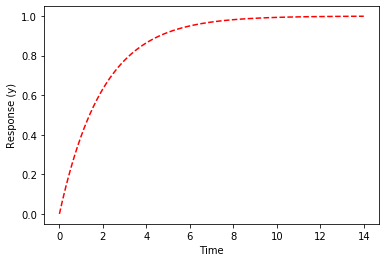

In [137]:
#(1) transferFunction
num=[k]
denom=[tau1,1]

sys=signal.TransferFunction(num,denom)

t,y=signal.step(sys)
plt.figure(1)
plt.plot(t,y,'r--')
plt.xlabel('Time')
plt.ylabel('Response (y)')

plt.show()

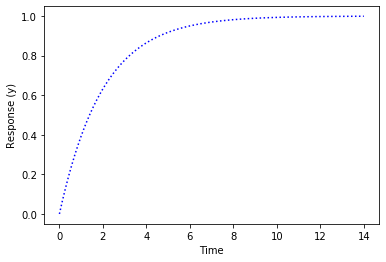

In [138]:
#(1) odeint
def model(y,t):
    x=1
    return (-y+k*x)/tau1

t=np.linspace(0,14,100)
y=odeint(model,0,t)

plt.figure(1)
plt.plot(t,y,'b:')
plt.xlabel('Time')
plt.ylabel('Response (y)')

plt.show()

In [139]:
#secondOrder
kp=2.0
tau2=1.0
zeta=0.25
dx=1.0

$\frac{Y(s)}{X(s)} = \frac{K_p}{\tau^2 s^2 +2 \tau \zeta s +1}$

$\tau^2 \frac{d^2y}{dt^2} + 2 \zeta \tau \frac{dy}{dt} = -y +K_p$


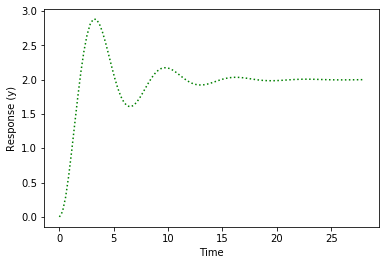

In [140]:
#(1) transferFunction
num=[kp]
denom=[tau2**2, 2*zeta*tau2, 1]

sys1=signal.TransferFunction(num,denom)
t1,y1=signal.step(sys1)

plt.figure(1,)
plt.plot(t1,y1,'g:')
plt.xlabel('Time')
plt.ylabel('Response (y)')

plt.show()


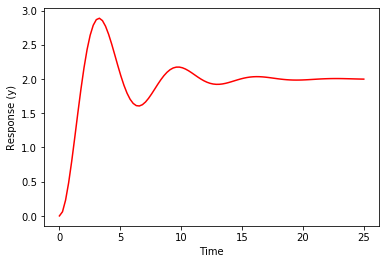

In [141]:
# (2) ODE Integrator
def model1(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau2*dydt - y + kp*dx)/tau2**2
    return [dydt,dy2dt2]
t1 = np.linspace(0,25,100)
u1 = odeint(model1,[0,0],t1)
y1 = u1[:,0]

plt.figure(1)
plt.plot(t1,y1,'r-')

plt.xlabel('Time')
plt.ylabel('Response (y)')

plt.show()
